# Preprocess Amazon_Fashion and Amazon_Fashion_5core dataset

In [18]:
import pandas as pd

# Read the JSON file into a pandas dataframe
df = pd.read_json('../Final/data/AMAZON_FASHION.json', lines=True)

# Display the first few rows of the dataframe
df.head()


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,NaN,NaN
1,2,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3.0,NaN,NaN
2,4,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN,NaN,NaN
3,2,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,NaN,NaN,NaN
4,3,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,NaN,NaN,NaN


In [19]:
# Basic statistics for the numeric columns
basic_stats = df.describe()

# Checking for missing values
missing_values = df.isnull().sum()
basic_stats, missing_values


(            overall  unixReviewTime          vote
 count  883636.00000    8.836360e+05  79900.000000
 mean        3.90694    1.456751e+09      5.797434
 std         1.41828    4.430691e+07     12.365278
 min         1.00000    1.036973e+09      2.000000
 25%         3.00000    1.434240e+09      2.000000
 50%         5.00000    1.462234e+09      3.000000
 75%         5.00000    1.484266e+09      5.000000
 max         5.00000    1.538352e+09    966.000000,
 overall                0
 verified               0
 reviewTime             0
 reviewerID             0
 asin                   0
 reviewerName          92
 reviewText          1233
 summary              533
 unixReviewTime         0
 vote              803736
 style             579067
 image             854829
 dtype: int64)

In [20]:
# Get unique counts for categorical columns
unique_counts = df[['reviewerID', 'asin']].nunique()

unique_counts

reviewerID    749233
asin          186189
dtype: int64

In [21]:
import networkx as nx

# Initialize a bipartite graph
A = nx.Graph()

# Add nodes with the node attribute "bipartite"
A.add_nodes_from(df['reviewerID'].unique(), bipartite=0)  # Add reviewer nodes
A.add_nodes_from(df['asin'].unique(), bipartite=1)       # Add product nodes

# Add edges from the dataframe
edges = [(row['reviewerID'], row['asin']) for _, row in df.iterrows()]
A.add_edges_from(edges)

A.number_of_nodes(), A.number_of_edges()


(935422, 875121)

In [22]:
# Split the nodes by their set (either reviewerID or asin)
reviewer_nodes = {n for n, d in A.nodes(data=True) if d['bipartite']==0}
asin_nodes = set(A) - reviewer_nodes

# Compute the average degree for reviewerID nodes and asin nodes
avg_degree_reviewer = sum(dict(A.degree(reviewer_nodes)).values()) / len(reviewer_nodes)
avg_degree_asin = sum(dict(A.degree(asin_nodes)).values()) / len(asin_nodes)

avg_degree_reviewer, avg_degree_asin


(1.1680224976742883, 4.700175627990912)

# Preprocess Drugs.com dataset
## The dataset includes: disease (condition), drug name, ratings, review text, usefulCounts, time.

In [8]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv("../Final/data/drugscom/drugsComTrain_raw.tsv", delimiter='\t').dropna()
test_data = pd.read_csv("../Final/data/drugscom/drugsComTest_raw.tsv", delimiter='\t').dropna()

train_data.shape, train_data.head(), test_data.shape, test_data.head()

((160398, 7),
    Unnamed: 0                  drugName                     condition  \
 0      206461                 Valsartan  Left Ventricular Dysfunction   
 1       95260                Guanfacine                          ADHD   
 2       92703                    Lybrel                 Birth Control   
 3      138000                Ortho Evra                 Birth Control   
 4       35696  Buprenorphine / naloxone             Opiate Dependence   
 
                                               review  rating  \
 0  "It has no side effect, I take it in combinati...     9.0   
 1  "My son is halfway through his fourth week of ...     8.0   
 2  "I used to take another oral contraceptive, wh...     5.0   
 3  "This is my first time using any form of birth...     8.0   
 4  "Suboxone has completely turned my life around...     9.0   
 
                 date  usefulCount  
 0       May 20, 2012           27  
 1     April 27, 2010          192  
 2  December 14, 2009           17  


In [9]:
# Combine the train and test datasets
combined_data = pd.concat([train_data, test_data], ignore_index=True)
combined_data.shape, combined_data.head()

((213869, 7),
    Unnamed: 0                  drugName                     condition  \
 0      206461                 Valsartan  Left Ventricular Dysfunction   
 1       95260                Guanfacine                          ADHD   
 2       92703                    Lybrel                 Birth Control   
 3      138000                Ortho Evra                 Birth Control   
 4       35696  Buprenorphine / naloxone             Opiate Dependence   
 
                                               review  rating  \
 0  "It has no side effect, I take it in combinati...     9.0   
 1  "My son is halfway through his fourth week of ...     8.0   
 2  "I used to take another oral contraceptive, wh...     5.0   
 3  "This is my first time using any form of birth...     8.0   
 4  "Suboxone has completely turned my life around...     9.0   
 
                 date  usefulCount  
 0       May 20, 2012           27  
 1     April 27, 2010          192  
 2  December 14, 2009           17  


## Get statistics of the whole dataset: unique diseases and unique drugs; mean rating.

In [10]:
combined_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Get basic statistics for numerical columns
numerical_stats = combined_data.describe()

# Get unique counts for categorical columns
unique_counts = combined_data[['drugName', 'condition']].nunique()

numerical_stats, unique_counts

(              rating    usefulCount
 count  213869.000000  213869.000000
 mean        6.991149      28.094118
 std         3.275792      36.401377
 min         1.000000       0.000000
 25%         5.000000       6.000000
 50%         8.000000      16.000000
 75%        10.000000      36.000000
 max        10.000000    1291.000000,
 drugName     3667
 condition     916
 dtype: int64)

In [11]:
missing_values = combined_data.isnull().sum()
missing_values

drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

## Visualize the Bipartite Graph of (disease, drug) pairs
### take depression disease for example

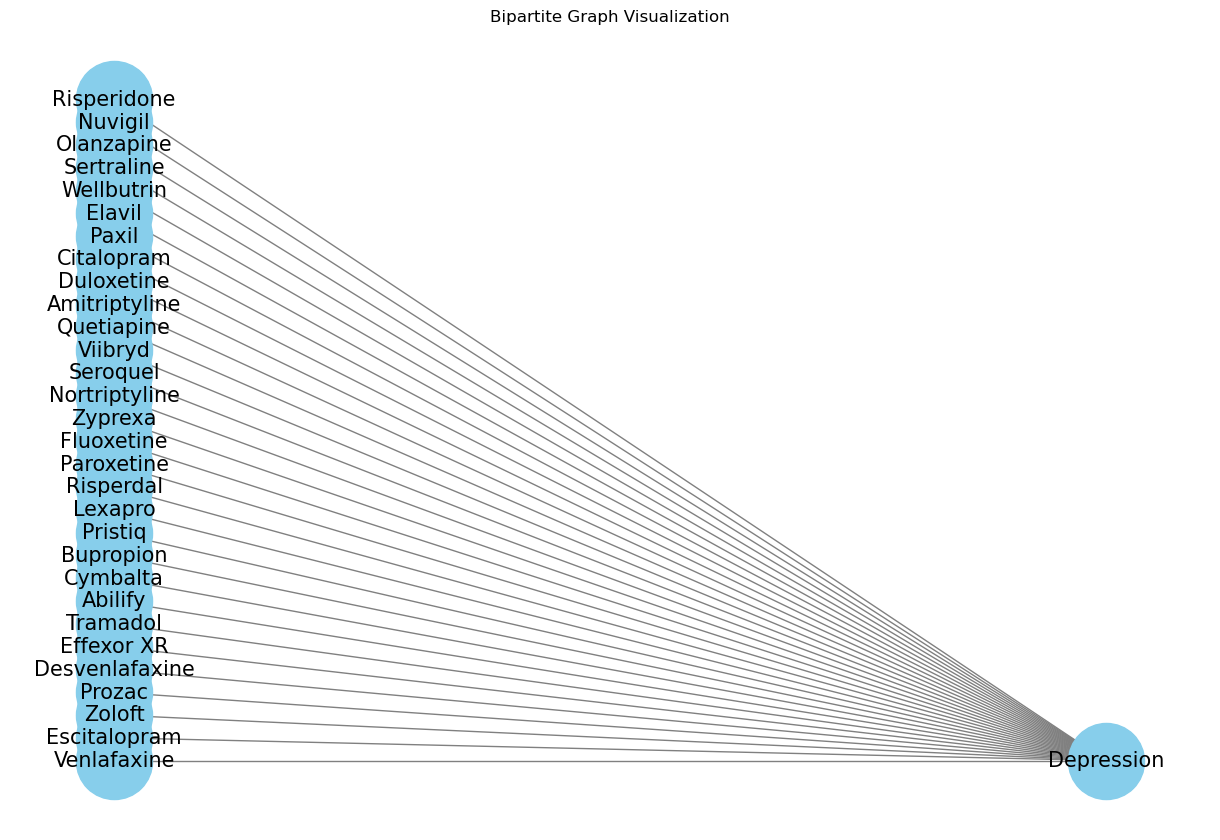

In [12]:
import networkx as nx

# Initialize a bipartite graph
B = nx.Graph()

# Add nodes with the node attribute "bipartite"
B.add_nodes_from(combined_data['drugName'].unique(), bipartite=0)
B.add_nodes_from(combined_data['condition'].unique(), bipartite=1)

# Add edges from the dataframe
edges = [(row['drugName'], row['condition']) for _, row in combined_data.iterrows()]
B.add_edges_from(edges)

# Check number of nodes and edges
num_nodes = B.number_of_nodes()
num_edges = B.number_of_edges()

import matplotlib.pyplot as plt

def plot_bipartite_subgraph(B, nodes_subset):
    """
    Plots the bipartite graph for the given subset of nodes.
    """
    pos = nx.bipartite_layout(B, nodes_subset)
    plt.figure(figsize=(12, 8))
    nx.draw(B, pos, with_labels=True, node_color="skyblue", node_size=3000, font_size=15, edge_color="gray")
    plt.title("Bipartite Graph Visualization")
    plt.show()

# Extract the subgraph for the condition "Depression"
depression_neighbors = list(B.neighbors("Depression"))

# Select top 30 drugs connected to the "Depression" node based on their degree
top_drugs_for_depression = sorted(B.degree(depression_neighbors), key=lambda x: x[1], reverse=True)[:30]
top_drugs_nodes = [node for node, degree in top_drugs_for_depression]

# Extract the subgraph for these top drugs and the "Depression" node
B_top_depression = B.subgraph(["Depression"] + top_drugs_nodes)

# Plot the subgraph centered around "Depression" with top 30 drugs
plot_bipartite_subgraph(B_top_depression, top_drugs_nodes)
